In [1]:
#Imbalanced Classification Problem
#Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Read the input file

dataset = pd.read_csv('creditcard1.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
#Check for missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [11]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
#Find out number of values in each class. 
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [14]:
#The ratio of 0s to 1s is 1:577. This is a clear case of Imbalances class classification
X = dataset.drop('Class',axis=1)
y = dataset['Class']

In [15]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [16]:
#Being imbalanced classification, we cannot ensure the predictions will be correct for the minority class
#So we will perform a SMOTE to balance out the two classes. Lets split the dataset into train and test before that
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [18]:
y_test.value_counts()

0    85296
1      147
Name: Class, dtype: int64

In [19]:
#Smote will only be applied on the training dataset

from imblearn.over_sampling import SMOTE
print('Before Oversampling: \n')
print('Count of labels with 0: {}\n'.format(sum(y_train==0)))
print('Count of labels with 1: {}\n'.format(sum(y_train==1)))

Before Oversampling: 

Count of labels with 0: 199019

Count of labels with 1: 345



In [21]:
sm = SMOTE(random_state=2,k_neighbors=5)
X_train_res,y_train_res = sm.fit_sample(X_train,y_train.ravel())

print('After Oversampling \n')
print('Count of labels with 0: {}\n'.format(sum(y_train_res==0)))
print('Count of labels with 1: {}\n'.format(sum(y_train_res==1)))

After Oversampling 

Count of labels with 0: 199019

Count of labels with 1: 199019



In [25]:
#Perform a Kfold cross validation and train/test the folds using LogisticRegression algorithm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = {'C':(0.01,0.1,2,10,50)}
lr = LogisticRegression()
clf = GridSearchCV(lr,parameters,cv=5,verbose=5)
clf.fit(X_train_res,y_train_res.ravel()) 


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.01 ..........................................................
[CV] ................. C=0.01, score=0.9701788764948246, total=   8.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.1s remaining:    0.0s


[CV] ................. C=0.01, score=0.9711084313134358, total=   7.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.0s remaining:    0.0s


[CV] ................. C=0.01, score=0.9710707466586272, total=   7.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   23.8s remaining:    0.0s


[CV] ................. C=0.01, score=0.9749020198974977, total=   7.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   31.8s remaining:    0.0s


[CV] ................. C=0.01, score=0.9749390749440997, total=   7.8s
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.9701788764948246, total=   8.0s
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.9711335544166415, total=   8.1s
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.9710581851070245, total=   8.1s
[CV] C=0.1 ...........................................................
[CV] ................... C=0.1, score=0.974876896794292, total=   7.9s
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.9749139512097078, total=   7.7s
[CV] C=2 .............................................................
[CV] .................... C=2, score=0.9703044920108532, total=   7.9s
[CV] C=2 .............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  3.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': (0.01, 0.1, 2, 10, 50)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=5)

In [26]:
clf.best_params_

{'C': 2}

In [27]:
lr1 = LogisticRegression(C=2,penalty='l2',verbose=5)
lr1.fit(X_train_res,y_train_res.ravel())

[LibLinear]

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=5, warm_start=False)

In [35]:
from sklearn.metrics import confusion_matrix,recall_score,roc_auc_score,precision_score
y_pre = lr1.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pre)
print(cnf_matrix)
#The number of correct predictions total 84192+129 = 84321. Only 18 predictions have turned out to be false negative. 
#It is reasonable because lower the FN, (higher recall) better the accuracy of the predictions in this case
#Number of false positives (precision is low) is high

[[84192  1104]
 [   18   129]]


In [30]:
print('Recall metric in the test dataset: ',recall_score(y_test,y_pre))

Recall metric in the test dataset:  0.877551020408


In [36]:
print('Precision metric in the test dataset: ',precision_score(y_test,y_pre))

Precision metric in the test dataset:  0.104622871046


In [31]:
from sklearn.metrics import roc_curve,auc

tmp1 = lr1.fit(X_train_res,y_train_res.ravel())
y_pred_sample_score = tmp1.decision_function(X_test)

fpr,tpr,thresholds = roc_curve(y_test,y_pred_sample_score)
roc_auc = auc(fpr,tpr)

print(roc_auc)

[LibLinear]0.972586061249


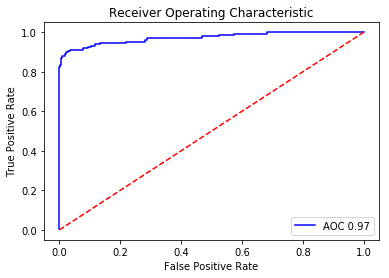

In [34]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b',label = 'AOC %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
#Lets run a quick few steps to figure out what would have happened if we had not applied the SMOTE. 
#Running the train_test_Split again
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

lr1 = LogisticRegression()
lr1.fit(X_train,y_train)
y_pred_1 = lr1.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred_1)
print(cnf_matrix)
#The number of True Positives reduces from 129 to 77, The number of false negatives increased to 70 from 18
#The accuracy 85285+77 = 85362 is higher than the accuracy derived after SMOTE. So clearly accuracy does not help judge the 
#goodness of the algorithm in certain imbalanced cases as there

[[85285    11]
 [   70    77]]


In [40]:
print('Recall metric in the test dataset: ',recall_score(y_test,y_pred_1))
#Recall reduces drastically. Reason is obvious

Recall metric in the test dataset:  0.52380952381
